In [104]:
import numpy
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [105]:
#Load Dataset
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('datasets/housing.csv', delim_whitespace=True, names = names)

In [106]:
#Descriptive Statistics
dataset.shape

(506, 14)

In [107]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [108]:
dataset.head(20)

CRIM    ZN  INDUS  CHAS   NOX    RM  ...  RAD    TAX  PTRATIO       B  LSTAT  MEDV
0   6.32e-03  18.0   2.31     0  0.54  6.58  ...    1  296.0     15.3  396.90   4.98  24.0
1   2.73e-02   0.0   7.07     0  0.47  6.42  ...    2  242.0     17.8  396.90   9.14  21.6
2   2.73e-02   0.0   7.07     0  0.47  7.18  ...    2  242.0     17.8  392.83   4.03  34.7
3   3.24e-02   0.0   2.18     0  0.46  7.00  ...    3  222.0     18.7  394.63   2.94  33.4
4   6.91e-02   0.0   2.18     0  0.46  7.15  ...    3  222.0     18.7  396.90   5.33  36.2
5   2.99e-02   0.0   2.18     0  0.46  6.43  ...    3  222.0     18.7  394.12   5.21  28.7
6   8.83e-02  12.5   7.87     0  0.52  6.01  ...    5  311.0     15.2  395.60  12.43  22.9
7   1.45e-01  12.5   7.87     0  0.52  6.17  ...    5  311.0     15.2  396.90  19.15  27.1
8   2.11e-01  12.5   7.87     0  0.52  5.63  ...    5  311.0     15.2  386.63  29.93  16.5
9   1.70e-01  12.5   7.87     0  0.52  6.00  ...    5  311.0     15.2  386.71  17.10  18.9
10  2.25e-01  12.5   7.87     0  0.52  6.38  ...    5  311.0     15.2  392.52  20.45  15.0
11  1.17e-01  12.5   7.87     0  0.52  6.01  ...    5  311.0     15.2  396.90  13.27  18.9
12  9.38e-02  12.5   7.87     0  0.52  5.89  ...    5  311.0     15.2  390.50  15.71  21.7
13  6.30e-01   0.0   8.14     0  0.54  5.95  ...    4  307.0     21.0  396.90   8.26  20.4
14  6.38e-01   0.0   8.14     0  0.54  6.10  ...    4  307.0     21.0  380.02  10.26  18.2
15  6.27e-01   0.0   8.14     0  0.54  5.83  ...    4  307.0     21.0  395.62   8.47  19.9
16  1.05e+00   0.0   8.14     0  0.54  5.93  ...    4  307.0     21.0  386.85   6.58  23.1
17  7.84e-01   0.0   8.14     0  0.54  5.99  ...    4  307.0     21.0  386.75  14.67  17.5
18  8.03e-01   0.0   8.14     0  0.54  5.46  ...    4  307.0     21.0  288.99  11.69  20.2
19  7.26e-01   0.0   8.14     0  0.54  5.73  ...    4  307.0     21.0  390.95  11.28  18.2

[20 rows x 14 columns]

In [109]:
set_option('precision', 1)
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS    NOX  ...    TAX  PTRATIO      B  LSTAT   MEDV
count  5.1e+02  506.0  506.0  5.1e+02  506.0  ...  506.0    506.0  506.0  506.0  506.0
mean   3.6e+00   11.4   11.1  6.9e-02    0.6  ...  408.2     18.5  356.7   12.7   22.5
std    8.6e+00   23.3    6.9  2.5e-01    0.1  ...  168.5      2.2   91.3    7.1    9.2
min    6.3e-03    0.0    0.5  0.0e+00    0.4  ...  187.0     12.6    0.3    1.7    5.0
25%    8.2e-02    0.0    5.2  0.0e+00    0.4  ...  279.0     17.4  375.4    6.9   17.0
50%    2.6e-01    0.0    9.7  0.0e+00    0.5  ...  330.0     19.1  391.4   11.4   21.2
75%    3.7e+00   12.5   18.1  0.0e+00    0.6  ...  666.0     20.2  396.2   17.0   25.0
max    8.9e+01  100.0   27.7  1.0e+00    0.9  ...  711.0     22.0  396.9   38.0   50.0

[8 rows x 14 columns]


In [110]:
set_option('precision', 2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX  ...   TAX  PTRATIO     B  LSTAT  MEDV
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42  ...  0.58     0.29 -0.39   0.46 -0.39
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  ... -0.31    -0.39  0.18  -0.41  0.36
INDUS    0.41 -0.53   1.00  6.29e-02  0.76  ...  0.72     0.38 -0.36   0.60 -0.48
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  ... -0.04    -0.12  0.05  -0.05  0.18
NOX      0.42 -0.52   0.76  9.12e-02  1.00  ...  0.67     0.19 -0.38   0.59 -0.43
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  ... -0.29    -0.36  0.13  -0.61  0.70
AGE      0.35 -0.57   0.64  8.65e-02  0.73  ...  0.51     0.26 -0.27   0.60 -0.38
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  ... -0.53    -0.23  0.29  -0.50  0.25
RAD      0.63 -0.31   0.60 -7.37e-03  0.61  ...  0.91     0.46 -0.44   0.49 -0.38
TAX      0.58 -0.31   0.72 -3.56e-02  0.67  ...  1.00     0.46 -0.44   0.54 -0.47
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19  ...  0.46     1.00 -0.18   0.37 -0.51
B       -0.39  0

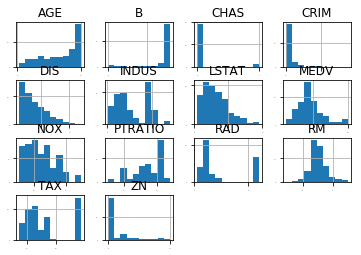

In [111]:
#Unimodel Data Visualizations
dataset.hist(sharex = False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

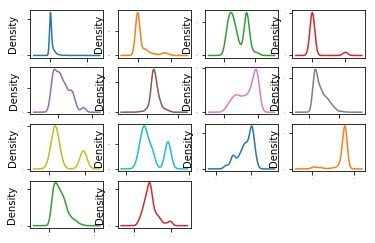

In [112]:
#density 
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)
pyplot.show()

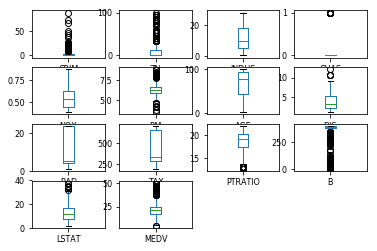

In [113]:
#boxplot 
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=8)
pyplot.show()

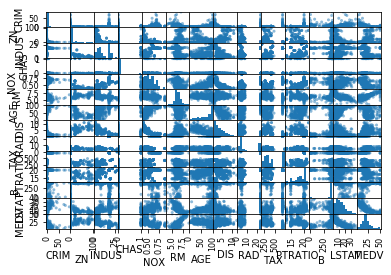

In [114]:
#Multimodel Data Visualizations
#Scatter Plot
scatter_matrix(dataset)
pyplot.show()

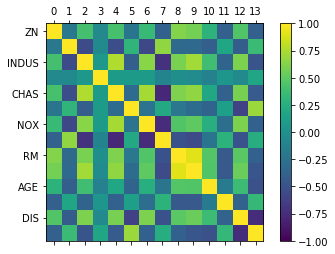

In [115]:
#correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin = -1, vmax = 1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_xticks(ticks)
ax.set_yticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [120]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
lab_enc = LabelEncoder()
Y = lab_enc.fit_transform(Y)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [121]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [122]:
#Spot Check 
models = []
models.append(('LR', LogisticRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [123]:
# evaluate each model in turn 
results = [] 
names = [] 
for name, model in models: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWar

LR: -1186.921585 (345.588314)
LASSO: -772.781809 (221.919191)
EN: -834.002665 (256.351617)
KNN: -1444.782332 (481.195886)
CART: -955.167256 (348.453987)
SVR: -3479.981103 (628.386643)


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarn

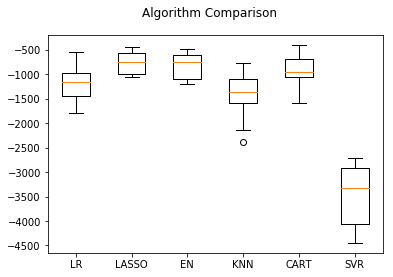

In [126]:
#Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [127]:
#Standardization
pipeline = []
pipeline.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipeline.append(('ScaledLasso', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipeline.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipeline.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipeline.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipeline.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])))

results = []
names = []

for name, model in models: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWar

LR: -1186.921585 (345.588314)
LASSO: -772.781809 (221.919191)
EN: -834.002665 (256.351617)
KNN: -1444.782332 (481.195886)
CART: -1035.691646 (370.013507)
SVR: -3479.981103 (628.386643)


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarn